In [341]:
import numpy as np
import matplotlib.pyplot as plt


In [342]:
import pandas as pd
DF = pd.read_csv("project1_1.csv")
data = DF.to_numpy()


In [343]:
#Question 1 Part 1
#Linear Discriminant Analysis(LDA)
def LDA(X,Class):
    X0 = []
    X1 = []
    for i in range(len(Class)):
        if Class[i] == 0:
            X0.append(X[i])
        else:
            X1.append(X[i])
    mean0 = np.mean(X0, axis=0)
    mean1 = np.mean(X1, axis=0)
    difmean = mean0 - mean1
    Sb = np.matmul(difmean,difmean.T)
    difference = X0 - mean0
    Sw = np.dot(difference.T,difference)
    difference = X1 - mean1
    Sw = Sw + np.dot(difference.T,difference)
    Sw_inv = np.linalg.pinv(Sw)
    w = np.matmul(Sw_inv,difmean)
    norm = np.linalg.norm(w)
    norm_w = w / norm
    return norm_w
x1, x2 = LDA(data[:,1:3],data[:,3])



In [344]:
#Creating LDA predictions using model
LDA_estimates = x1*data[:,1]+x2*data[:,2]
est0 = []
for i in range(len(LDA_estimates)):
    if (LDA_estimates[i] >= 0):
        est0.append(0)
    else:
        est0.append(1)
print(est0)

[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


In [345]:
#Perceptron
def perceptron(X, classes, learn_rate, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    theta = np.zeros((n+1,1))
    miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        miss = 0
        
        # looping for every example.
        for index, xi in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            xi = np.insert(xi, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            classes_pred = 0
            if(np.dot(xi.T, theta) >= 0):
                classes_pred = 1
            delta_E = (classes[index] - classes_pred)
            # Updating if the example is misclassified.
            if (classes_pred != classes[index]):
                theta = theta + learn_rate*(delta_E*xi)
                # Incrementing by 1.
                miss = miss + 1
        
        # Appending number of misclassified examples
        # at every iteration.
        miss_list.append(miss)
        
    return theta, miss_list

In [346]:
theta, lis = perceptron(data[:,1:3],data[:,3],0.1,100)
print(theta,lis)

[[ 0.1       ]
 [ 0.13539621]
 [-0.29571833]] [23, 20, 16, 16, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 19, 21, 19, 21, 18, 18, 18, 19, 21, 19, 21, 18, 16, 18, 16, 18, 16, 18, 16, 18, 18, 16, 18, 19, 21, 19, 21, 19, 21, 18, 18, 16, 18, 19, 21, 19, 21, 19, 21, 19, 21, 19, 21, 18, 19, 20, 19, 19, 20, 19, 18, 19, 20, 19, 19, 20, 19, 18, 19, 20, 19, 19, 20, 19, 18, 19, 20, 19, 19, 13, 18, 16, 18, 18, 20, 18, 18, 20, 18, 18, 20, 18, 18, 18]


In [347]:
#Creating Perceptron predictions based on the model
Per_estimates = 0.1+0.13539621*data[:,1]+-0.29571833*data[:,2]
est = []
for i in range(len(Per_estimates)):
    if (Per_estimates[i] >= 0):
        est.append(1)
    else:
        est.append(0)
print(est)

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]


In [348]:
#Logistic Regression
def funcsigmoid(X):
    a = 1/(1+np.exp(-X))
    return a 
def cost(X, Class, theta):
    m = np.shape(Class)[0]
    h = funcsigmoid(np.matmul(X, theta))
    eps = .00001
    cost = (1/m)*((np.matmul((-Class).T, np.log(h + eps)))-(np.matmul((1-Class).T, np.log(1-h + eps))))
    return cost
def logisticReg(X, classes, learn_rate,epochs):
    classes = classes[:,np.newaxis]
    m = len(classes)
    X = np.hstack((np.ones((m,1)),X))
    n = np.size(X,1)
    theta = np.zeros((n,1))
    cost_list = np.zeros((epochs,1))
    
    for epoch in range(epochs):
        theta = theta - learn_rate*(np.matmul(X.T, (funcsigmoid(np.matmul(X,theta)) - classes)))
        cost_list[epoch] = cost(X, classes, theta)
    return theta, cost_list


In [349]:
theta, costs = logisticReg(data[:,1:3], data[:,3],0.01,100)
print(theta)

#plt.plot(costs)


[[ 0.37070194]
 [ 1.19593049]
 [-4.05204216]]


In [350]:
#Creating Logistic Regression predictions based on the model
LogReg_estimates1 = 0.37070194+1.19593049*data[:,1]+-4.05204216*data[:,2]
est1 = []
for i in range(len(LogReg_estimates1)):
    if (LogReg_estimates1[i] >= 0.5):
        est1.append(1)
    else:
        est1.append(0)
print(est1)

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


In [351]:
#Question 1 Part 2
#The scores of the models classifications
import sklearn.metrics as metric
import sklearn.linear_model as lin
import sklearn.discriminant_analysis as dis

print("Linear Discriminant Analysis: ", metric.accuracy_score(est0, data[:,3]))
print("Perceptron: ",metric.accuracy_score(est, data[:,3]))
print("Logistic Regression: ", metric.accuracy_score(est1,data[:,3]))

Linear Discriminant Analysis:  0.87
Perceptron:  0.85
Logistic Regression:  0.87


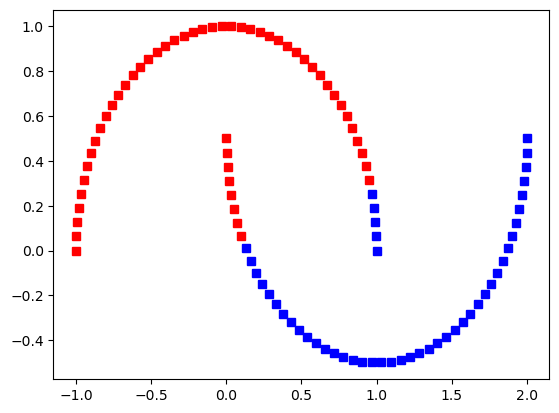

In [352]:
#Question 1 Part 3
#Visualizations

#LDA
X0 = []
X0_y = []
X1 = []
X1_y = []
for i in range(len(data)):
    if est0[i] == 0:
        X0.append(data[:,1][i])
        X0_y.append(data[:,2][i])
    else:
        X1.append(data[:,1][i])
        X1_y.append(data[:,2][i])
plt.plot(X0, X0_y, 'rs')
plt.plot(X1, X1_y, 'bs')


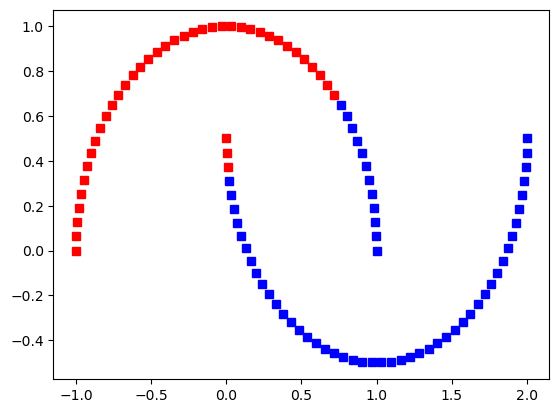

In [353]:
#Perceptron
X0 = []
X0_y = []
X1 = []
X1_y = []
for i in range(len(data)):
    if est[i] == 0:
        X0.append(data[:,1][i])
        X0_y.append(data[:,2][i])
    else:
        X1.append(data[:,1][i])
        X1_y.append(data[:,2][i])
plt.plot(X0, X0_y, 'rs')
plt.plot(X1, X1_y, 'bs')

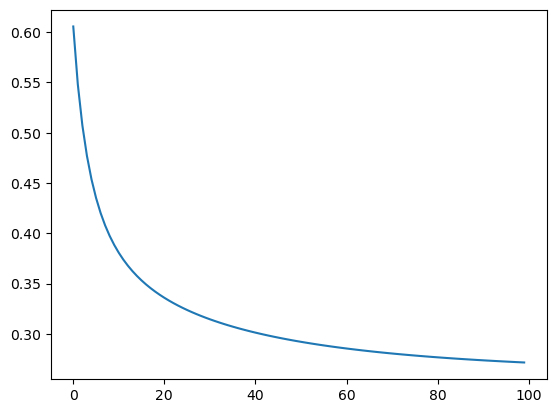

In [354]:
#Logistic Regression Cost Function
plt.plot(costs)

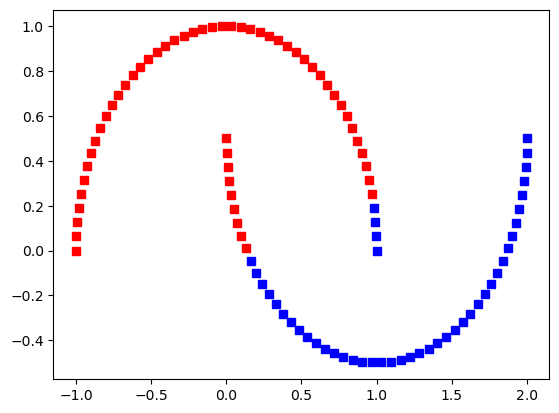

In [355]:
#Logistic Regression 
X0 = []
X0_y = []
X1 = []
X1_y = []
for i in range(len(data)):
    if est1[i] == 0:
        X0.append(data[:,1][i])
        X0_y.append(data[:,2][i])
    else:
        X1.append(data[:,1][i])
        X1_y.append(data[:,2][i])
plt.plot(X0, X0_y, 'rs')
plt.plot(X1, X1_y, 'bs')

In [359]:
#Question 2 Part 1
import sklearn.preprocessing as preproc
normal_data = preproc.scale(data[:,1:3])
# real_X0 = []
# real_X0_y = []
# real_X1 = []
# real_X1_y = []
# zeros = []
# ones = []
# for i in range(len(data)):
#     if data[:,3][i] == 0:
#         zeros.append(data[:,3][i])
#         real_X0.append(data[:,1][i])
#         real_X0_y.append(data[:,2][i])
#     else:
#         ones.append(data[:,3][i])
#         real_X1.append(data[:,1][i])
#         real_X1_y.append(data[:,2][i])
# # plt.plot(sqrt_data,2+data[:,2],'rs' )
# # plt.plot(2+data[:,1],2+data[:,2], 'b^')
# plt.plot(normal_data[:,0], normal_data[:,1], 'gs')

In [357]:
#Question 2 Part 2

#the process was standard scaling the data and then the percent of correct goes up by a 
#little bit for perceptron and logistic regression

#below is fitting the data again using the standardized data
import math 
norm_LDA_estimates = x1*normal_data[:,0]+x2*normal_data[:,1]
norm_est0 = []
for i in range(len(norm_LDA_estimates)):
    if (norm_LDA_estimates[i] >= 0):
        norm_est0.append(0)
    else:
        norm_est0.append(1)
print(norm_est0)

norm_Per_estimates = 0.1+0.13539621*normal_data[:,0]+-0.29571833*normal_data[:,1]
norm_est = []
for i in range(len(norm_Per_estimates)):
    if (norm_Per_estimates[i] >= 0):
        norm_est.append(1)
    else:
        norm_est.append(0)
print(norm_est)
norm_LogReg_estimates1 = 0.37070194+1.19593049*normal_data[:,0]+-4.05204216*normal_data[:,1]
norm_est1 = []
for i in range(len(norm_LogReg_estimates1)):
    if (norm_LogReg_estimates1[i] >= 0.5):
        norm_est1.append(1)
    else:
        norm_est1.append(0)
print(norm_est1)

[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]


In [358]:
print("Standardized Linear Discriminant Analysis: ", metric.accuracy_score(norm_est0, data[:,3]))
print("Standardized Perceptron: ",metric.accuracy_score(norm_est, data[:,3]))
print("Standardized Logistic Regression: ", metric.accuracy_score(norm_est1,data[:,3]))
#Scores improved in perceptron and logistic regression 

Standardized Linear Discriminant Analysis:  0.86
Standardized Perceptron:  0.86
Standardized Logistic Regression:  0.88
